In [ ]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets.samples_generator import make_circles

In [4]:
X, y = make_circles(n_samples=1000,
                   noise=0.1,
                   factor=0.2,
                   random_state=0)

In [5]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [7]:
X.shape

(1000, 2)

Text(0.5,1,'Blue Circle and Red Crosses')

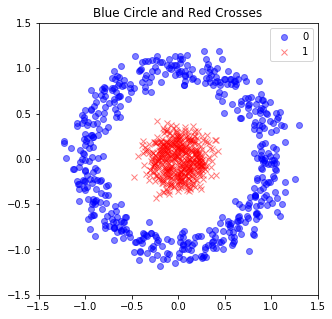

In [8]:
plt.figure(figsize=(5,5))
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend(['0','1'])
plt.title("Blue Circle and Red Crosses")

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [10]:
model = Sequential()

In [11]:
model.add(Dense(4,input_shape=(2,),activation='tanh'))

In [12]:
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X,y, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 1s 580us/step - loss: 0.6683 - acc: 0.6490
Epoch 2/20
1000/1000 [==============================] - 0s 60us/step - loss: 0.5748 - acc: 0.8280
Epoch 3/20
1000/1000 [==============================] - 0s 61us/step - loss: 0.4602 - acc: 0.8480
Epoch 4/20
1000/1000 [==============================] - 0s 61us/step - loss: 0.3412 - acc: 0.9230
Epoch 5/20
1000/1000 [==============================] - 0s 57us/step - loss: 0.2374 - acc: 0.9880
Epoch 6/20
1000/1000 [==============================] - 0s 61us/step - loss: 0.1684 - acc: 1.0000
Epoch 7/20
1000/1000 [==============================] - 0s 57us/step - loss: 0.1267 - acc: 1.0000
Epoch 8/20
1000/1000 [==============================] - 0s 70us/step - loss: 0.1003 - acc: 1.0000
Epoch 9/20
1000/1000 [==============================] - 0s 63us/step - loss: 0.0826 - acc: 1.0000
Epoch 10/20
1000/1000 [==============================] - 0s 64us/step - loss: 0.0699 - acc: 1.0000
Epoch 11/20
1000/1

In [15]:
hticks = np.linspace(-1.5,1.5,101)
vticks = np.linspace(-1.5,1.5, 101)
aa, bb = np.meshgrid(hticks,vticks)
ab = np.c_[aa.ravel(),bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

In [16]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5,1,'Blue circles and Red crosses')

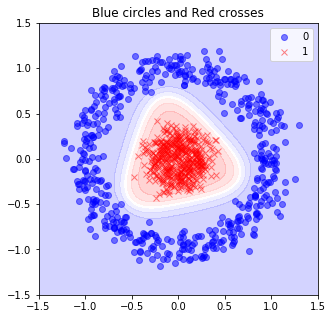

In [17]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [23]:
import numpy as np
def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div
x1 =np.array([[1,-2,0.5]])
softmax(x1)

array([[0.6037489 , 0.03005889, 0.36619222]])

In [36]:
def softMax(arr):
    arr1 = []
    i=0
    for val in arr:
        var = np.exp(val)
        arr1.append(var)
    sumVal = sum(arr1)
    for v in arr1:
        print (v/sumVal)
softMax([1,-2,0.5])

0.6037488961486257
0.030058887569574023
0.3661922162818002


In [37]:
import tensorflow as tf

In [43]:
#TensorFlow's softmax function
y = tf.nn.softmax([1,-2,0.5])
sess = tf.Session()
sess.run(y)

array([0.6037489 , 0.03005889, 0.36619222], dtype=float32)